### DATA

In [1]:
#Process the raw PHEME data set

from src.utils import DatasetCreator

dataset_creator = DatasetCreator(test=True)


/home/hp/anaconda3/envs/GNN_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_example = dataset_creator.get_dataframe()

In [3]:
data_example.head()

,id_post,class,subject,text,Media_url
0,500388199064420352,0,ferguson-all-rnr-threads,Hard to believe this guy assaulted a cop. 😂😂😂 ...,http://pbs.twimg.com/media/BvG8ak6IQAAE2zx.jpg
1,500306187624407040,0,ferguson-all-rnr-threads,The day #Ferguson cops beat a man and charged ...,http://pbs.twimg.com/media/BvFrRW0CUAIN9JE.jpg
2,500413818368184321,0,ferguson-all-rnr-threads,"Remarkably, despite the military-style police ...",NaN
3,500292426154528770,0,ferguson-all-rnr-threads,If Mike Brown was engaged in a robbery before ...,NaN
4,500360889347096576,0,ferguson-all-rnr-threads,so ... they clearly released that video only ...,NaN


In [4]:
data_example['class'].value_counts()

class
1    19
0    14
Name: count, dtype: int64

### PMIGraphConstructor

In [5]:
from src.utils import GraphConstructor

In [14]:
graph_constructor = GraphConstructor(window_size=5)

In [15]:
first_row = data_example.iloc[0]
graph = graph_constructor.construct_graph(row=first_row)

In [16]:
first_row.text

'A Canadian soldier who was standing on guard for thee is gone. Our thoughts are w everyone affected by the shootings in Ottawa #CanadaStrong'

In [8]:
graph.nodes['to']['embedding'].shape

(768,)

In [9]:
print(graph)

Graph with 10 nodes and 21 edges


In [10]:
graph.graph

{'class': 0, 'subject': 'ferguson-all-rnr-threads'}

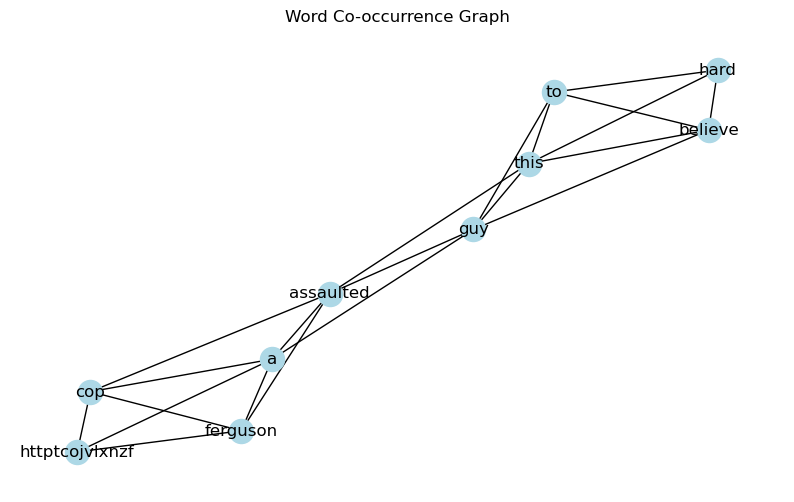

In [11]:
graph_constructor.visualize_graph(graph)

## PhemeDataset

In [10]:
from src.utils.PHEME_dataset import PHEMEDataset

pheme_dataset = PHEMEDataset(test=True,embedding="bert")

In [11]:
pheme_dataset

PHEMEDataset(4550)

In [12]:
from torch_geometric.loader import DataLoader

loader = DataLoader(pheme_dataset,batch_size=2,shuffle=True)

In [13]:
for x in loader:
    print(x)
    break

DataBatch(edge_index=[2, 28], class=[2], subject=[2], x=[29, 768], edge_attr=[28, 1], y=[2], batch=[29], ptr=[3])


In [14]:
x.x.shape

torch.Size([29, 768])

## GCN Model

In [15]:
from src.models import KMGCN

In [23]:
model = KMGCN(768,64,2,'max')

In [24]:
print(x.x.type())
print(x.edge_index.type())

torch.FloatTensor
torch.LongTensor


In [25]:
model(x).shape

torch.Size([2, 2])

In [33]:
data_example['class'].value_counts()

class
1    19
0    14
Name: count, dtype: int64

In [28]:
for i in range(2000):
    print(pheme_dataset[i].y.item())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


IndexError: range object index out of range